In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
# Step 1 : Demonstrate that the dataset can be read from the web into R 
url <- "https://raw.githubusercontent.com/tracyw98/Project-Proposal-/main/investments_VC.csv"
startup_data <- read_csv(url)
startup_data 

Rows: 54294 Columns: 39
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): permalink, name, homepage_url, category_list, market, funding_tot...
dbl  (23): funding_rounds, founded_year, seed, venture, equity_crowdfunding,...
date  (3): founded_at, first_funding_at, last_funding_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,⋯,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,⋯,0,0,0,0,0,0,0,0,0,0
/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,⋯,0,0,0,0,0,0,0,0,0,0
/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NA,Tallinn,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [4]:
#step2: determine if there are NAs in each column. 
missing_market <- startup_data |>
  select(market) |>
  group_by(market) |>
  summarise(count = n()) |>
  arrange(market)


missing_status <- startup_data |>
  select(status) |>
  group_by(status) |>
  summarise(count = n()) |>
  arrange(status)


missing_funding <- startup_data |>
  select(funding_total_usd) |>
  group_by(funding_total_usd) |>
  summarise(count = n()) |>
  arrange(funding_total_usd)

missing_market 
missing_status
missing_funding

market,count
<chr>,<int>
3D,25
3D Printing,9
3D Technology,8
⋮,⋮
Writers,1
Young Adults,2
NA,8824


status,count
<chr>,<int>
acquired,3692
closed,2603
operating,41829
NA,6170


funding_total_usd,count
<chr>,<int>
-,8531
1,1
"1,00,00,00,000",2
⋮,⋮
"99,99,997",1
"99,99,999",1
NA,4856


In [5]:
glimpse(missing_funding)

Rows: 14,618
Columns: 2
$ funding_total_usd <chr> "-", "1", "1,00,00,00,000", "1,00,00,000", "1,00,00,…
$ count             <int> 8531, 1, 2, 489, 2, 1, 1, 1, 1, 749, 2, 1, 1, 1, 1, …


In [6]:
selected_column <- startup_data |>
    na.omit()|>
    select (market,status, funding_total_usd)

In [12]:
#step 2: Clean and wrangle your data into a tidy format, change status to a factor
clean_startup_1 <- startup_data |>
    na.omit()|>
    select(name, country_code, market,status, funding_total_usd)|>
    mutate(status = as_factor(status))|>
     mutate(funding_total_usd = as.numeric(gsub(",", "", funding_total_usd)))

clean_startup_2 <- clean_startup_1 |> 
    na.omit() |>
    mutate(funding_total_usd = as.numeric(gsub("-", "", funding_total_usd)))

clean_startup_1
clean_startup_2

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


name,country_code,market,status,funding_total_usd
<chr>,<chr>,<chr>,<fct>,<dbl>
#waywire,USA,News,acquired,1750000
004 Technologies,USA,Software,operating,NA
1-800-DENTIST,USA,Health and Wellness,operating,NA
⋮,⋮,⋮,⋮,⋮
Zyngenia,USA,Biotechnology,operating,25000000
ZYOMYX,USA,Biotechnology,operating,34275015
[x+1],USA,Enterprise Software,operating,45000000


name,country_code,market,status,funding_total_usd
<chr>,<chr>,<chr>,<fct>,<dbl>
#waywire,USA,News,acquired,1750000
1-800-DOCTORS,USA,Health and Wellness,operating,1750000
10-20 Media,USA,E-Commerce,operating,2050000
⋮,⋮,⋮,⋮,⋮
Zyngenia,USA,Biotechnology,operating,25000000
ZYOMYX,USA,Biotechnology,operating,34275015
[x+1],USA,Enterprise Software,operating,45000000


In [13]:
#step 3: Double checking to see if there are any left over NAs from selected_column_2
check_for_nas <- clean_startup_2  |>
  select(funding_total_usd) |>
  group_by(funding_total_usd) |>
  summarise(count = n()) |>
  arrange(funding_total_usd)
check_for_nas

funding_total_usd,count
<dbl>,<int>
30,1
50,1
80,1
⋮,⋮
800,2
900,1
NA,21824


In [14]:
#step 4: summarizing the data to report the number of observations in each class

summary_market <- clean_startup_2|>
  select(market) |>
  group_by(market) |>
  summarise(count = n()) |>
  arrange(market)


summary_status <- clean_startup_2 |>
  select(status) |>
  group_by(status) |>
  summarise(count = n()) |>
  arrange(status)


summary_funding <- clean_startup_2 |>
  select(funding_total_usd) |>
  group_by(funding_total_usd) |>
  summarise(count = n()) |>
  arrange(funding_total_usd)

summary_market
summary_status
summary_funding


market,count
<chr>,<int>
3D,8
3D Printing,2
3D Technology,3
⋮,⋮
Women,5
World Domination,4
Writers,1


status,count
<chr>,<int>
acquired,2202
closed,1190
operating,18448


funding_total_usd,count
<dbl>,<int>
30,1
50,1
80,1
⋮,⋮
800,2
900,1
NA,21824


In [15]:
#step 5: Splitting the data 

clean_data_split <- initial_split(clean_startup_2, prop = 0.75, strata = status)
data_train <- training(clean_data_split)
data_test <- testing(clean_data_split)

glimpse(data_test)

Rows: 5,460
Columns: 3
$ market            <chr> "Software", "Analytics", "Software", "Entertainment"…
$ status            <chr> "operating", "acquired", "operating", "operating", "…
$ funding_total_usd <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …


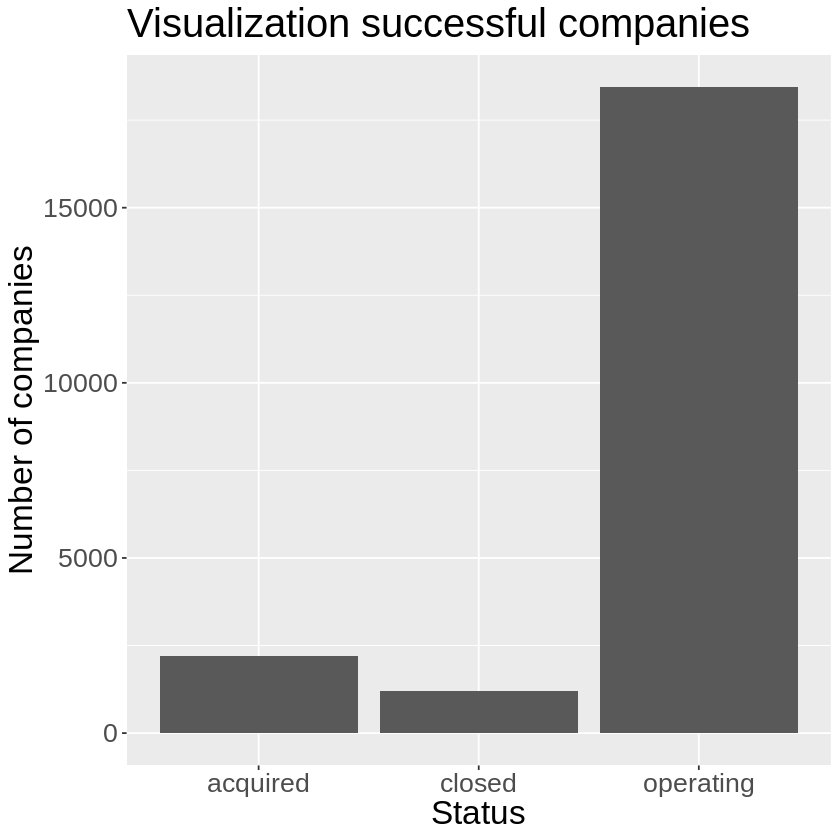

In [18]:
#visualizing the data

vis_plot <- summary_status |>
    ggplot(aes(x = status, y = count)) +
    geom_bar(stat = "identity") +
    labs(x = "Status",
         y = "Number of companies",
         title = "Visualization successful companies") +
    theme(text = element_text(size = 20))
vis_plot